In [3]:
# Import libraries

import pandas # https://pandas.pydata.org/

from sklearn import model_selection # for model comparisons

import matplotlib.pyplot as pl  # https://matplotlib.org/

# algorithms
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Let's set up our standard example problem: 
# Can we predict 'callSign' using these three features:  'Depth', 'Temperature', 'Salinity' ?

# Load the data
print('Loading data from file ...')  
dataset = pandas.read_csv('../Week #1 materials-20230125/floats.csv')
print('Removing rows with missing data ...')  
dataset = dataset.dropna()
print('Reading list of problem variables X and y...')
X_name = [ 'Depth', 'Temperature', 'Salinity' ] 
y_name = 'callSign'
X = dataset[X_name]   
y = dataset[y_name]   

# setting the seed allows for repeatability
seed = 42 

print('Partitioning data into parts: formative (for development) and summative (for testing) ...')
test_size = 0.20   # means 20 percent
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

print('done \n')

Loading data from file ...
Removing rows with missing data ...
Reading list of problem variables X and y...
Partitioning data into parts: formative (for development) and summative (for testing) ...
done 



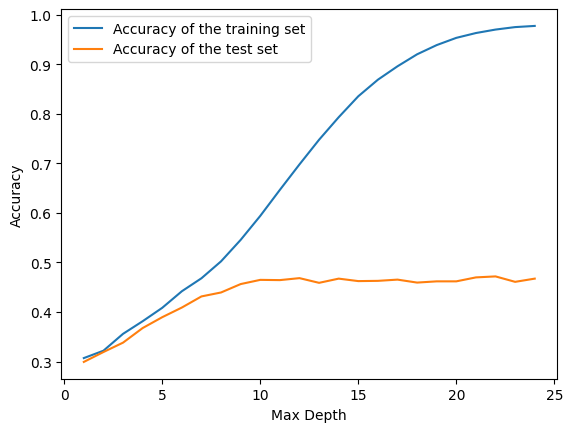

In [5]:
# Now it is time to train some models on the data and estimate their accuracy on unseen data.

training_accuracy = []
test_accuracy = []

max_dep = range(1,25)
neighbors_setting = range(1,25)

for md in max_dep:
    tree = DecisionTreeClassifier( max_depth=md,random_state=seed )
    tree.fit( X_train,y_train )
    training_accuracy.append( tree.score(X_train, y_train) )
    test_accuracy.append( tree.score(X_test, y_test) )
 
pl.plot( max_dep,training_accuracy, label='Accuracy of the training set' )
pl.plot( max_dep,test_accuracy, label='Accuracy of the test set' )
pl.ylabel('Accuracy')
pl.xlabel('Max Depth')
pl.legend()
pl.show()

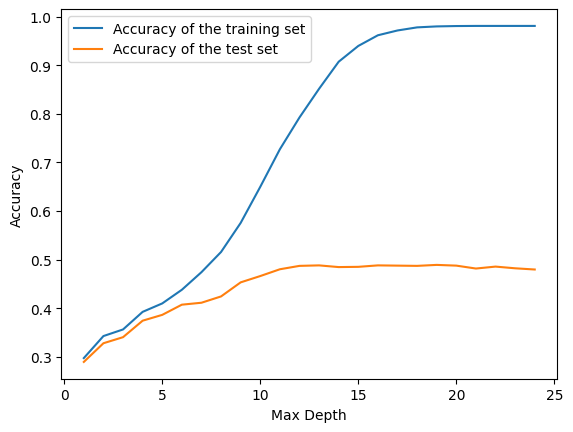

In [6]:
training_accuracy = []
test_accuracy = []

max_dep = range(1,25)
neighbors_setting = range(1,25)

for md in max_dep:
    tree = RandomForestClassifier( max_depth=md,random_state=seed)
    tree.fit( X_train,y_train )
    training_accuracy.append( tree.score(X_train, y_train) )
    test_accuracy.append( tree.score(X_test, y_test) )
 
pl.plot( max_dep,training_accuracy, label='Accuracy of the training set' )
pl.plot( max_dep,test_accuracy, label='Accuracy of the test set' )
pl.ylabel('Accuracy')
pl.xlabel('Max Depth')
pl.legend()
pl.show()